In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\jpabb\\Downloads\\retail_sales_dataset.csv")

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [5]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
# Handle incorrect date format by converting to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)  # Remove rows with invalid dates

In [9]:
# Handling Outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping the outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Identify numeric columns and apply the function only to them
numeric_columns = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    df = handle_outliers(df, col)

# Save the cleaned DataFrame
output_cleaned_path = 'retail_sales_data_cleaned.csv'
df.to_csv(output_cleaned_path, index=False)


### Data Aggregation

In [ ]:
daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()

customer_sales = df.groupby('Customer ID')['Total Amount'].sum().reset_index()

product_sales = df.groupby('Product Category')['Total Amount'].agg(['sum', 'mean']).reset_index()


### Analysis

In [12]:
sales_per_product = df.groupby("Product Category")["Total Amount"].agg(Total_Sales="sum", Average_Sales="mean")
sales_per_product


,Total_Sales,Average_Sales
Product Category,,
Beauty,143515,467.475570
Clothing,155580,443.247863
Electronics,156905,458.786550


In [13]:
top_customer = customer_sales.loc[customer_sales['Total Amount'].idxmax()]
top_customer


Customer ID     CUST015
Total Amount       2000
Name: 14, dtype: object

In [16]:
import pandas as pd
df = pd.read_csv("C:\\Users\\jpabb\\Downloads\\retail_sales_dataset.csv")

df['Discount Applied'] = df['Price per Unit'] - (df['Total Amount'] / df['Quantity'])

discount_sales_corr = df[['Discount Applied', 'Total Amount']].corr().iloc[0, 1]

print("Correlation between Discount Applied and Total Amount:", discount_sales_corr)

Correlation between Discount Applied and Total Amount: nan


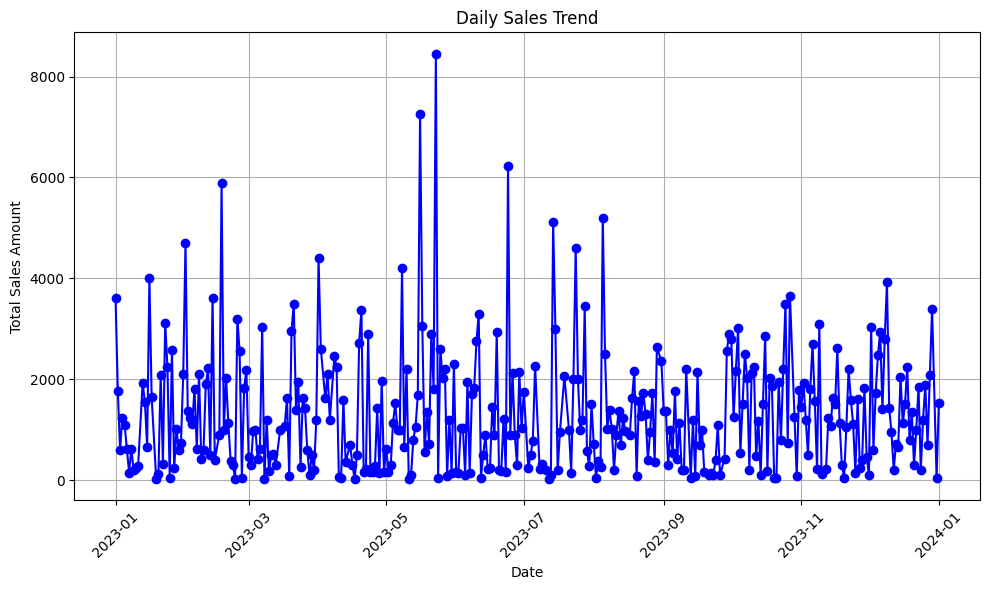

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'], marker='o', color='b')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

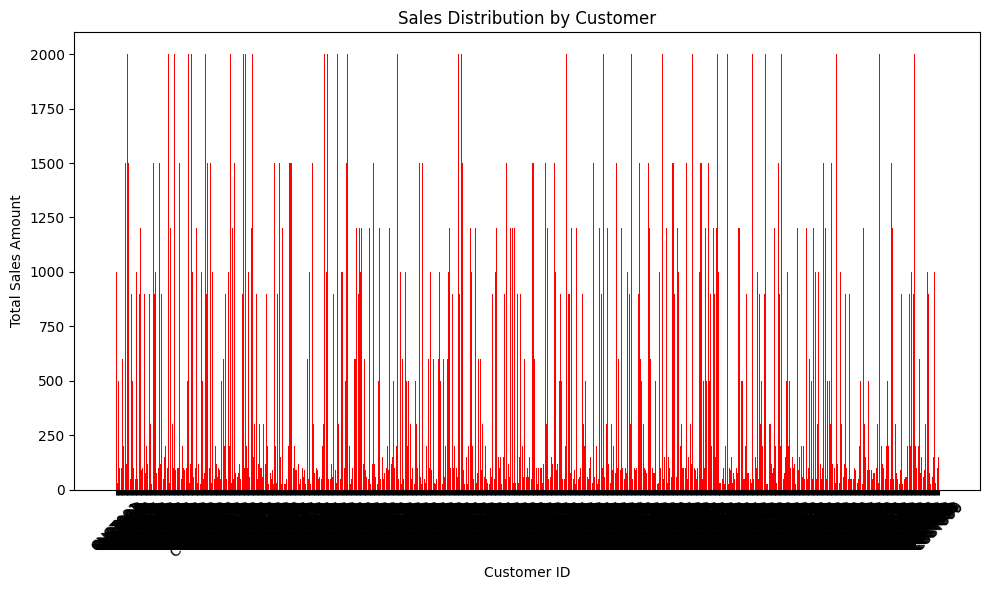

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(customer_sales['Customer ID'],customer_sales['Total Amount'], color='red')
plt.title("Sales Distribution by Customer")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

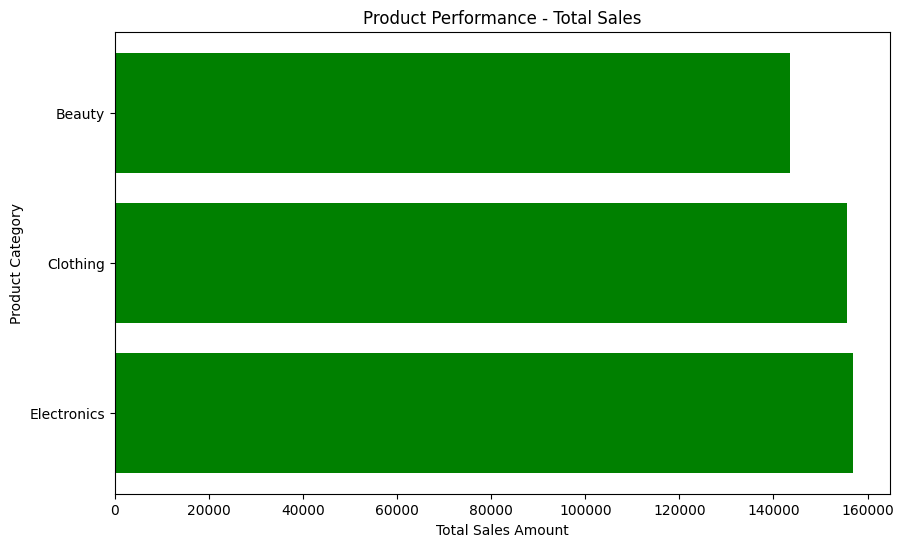

In [ ]:
df.columns = df.columns.str.strip()

product_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()

product_sales = product_sales.sort_values(by='Total Amount', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(product_sales['Product Category'], product_sales['Total Amount'], color='green')
plt.title("Product Performance - Total Sales")
plt.xlabel("Total Sales Amount")
plt.ylabel("Product Category")
plt.show()